In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
from prophet import Prophet

In [ ]:
df=pd.read_csv('BTC-USD.csv')

In [ ]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [ ]:
px.area(df,x='Date',y='Close')

In [ ]:
px.line(df,x='Date',y='Close')

In [ ]:
training_dataset=df[['Date','Close']]

In [ ]:
training_dataset.head()

,ds,y
0,2014-09-17,457.334015
1,2014-09-18,424.440002
2,2014-09-19,394.795990
3,2014-09-20,408.903992
4,2014-09-21,398.821014


In [ ]:
training_dataset=training_dataset.rename(columns={'Date':'ds','Close':'y'})

,Date,Close
0,2014-09-17,457.334015
1,2014-09-18,424.440002
2,2014-09-19,394.795990
3,2014-09-20,408.903992
4,2014-09-21,398.821014
...,...,...
3151,2023-05-04,28847.710938
3152,2023-05-05,29534.384766
3153,2023-05-06,28904.623047
3154,2023-05-07,28454.978516


In [ ]:
model=Prophet()

In [ ]:
model.fit(training_dataset)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbv_1is4j/rz47s1ib.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbv_1is4j/l6ihv213.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=14754', 'data', 'file=/tmp/tmpbv_1is4j/rz47s1ib.json', 'init=/tmp/tmpbv_1is4j/l6ihv213.json', 'output', 'file=/tmp/tmpbv_1is4j/prophet_modelm8h391tz/prophet_model-20230508085413.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:54:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:54:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
future=model.make_future_dataframe(periods=113)

In [ ]:
forecast=model.predict(future)

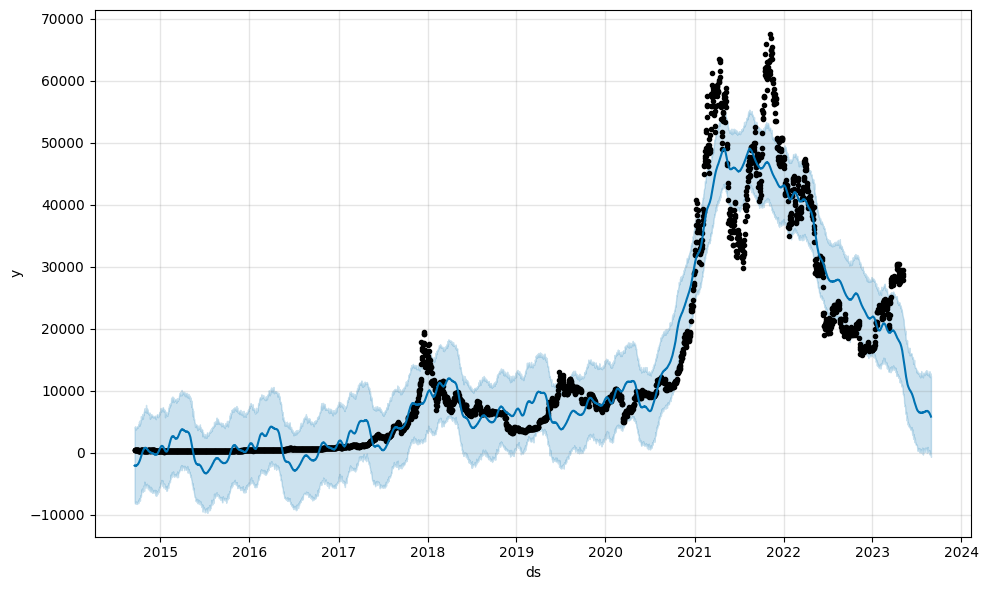

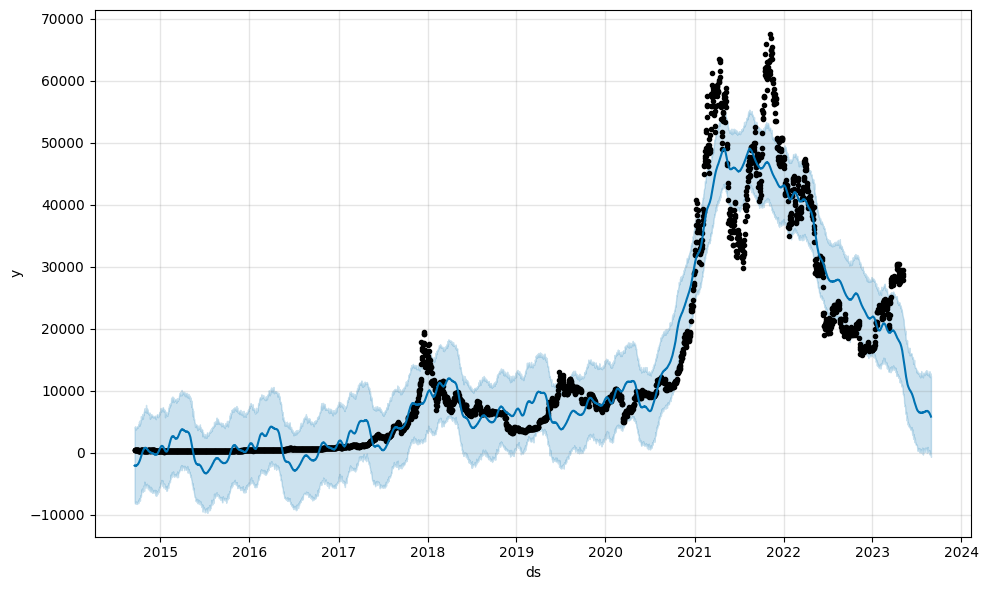

In [ ]:
model.plot(forecast,xlabel='ds',ylabel='y')

In [ ]:
forecast.to_csv('forecast.csv')

In [ ]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2014-09-17,-150.578082,-7845.677854,4124.312543,-150.578082,-150.578082,-1925.261612,-1925.261612,-1925.261612,17.916054,17.916054,17.916054,-1943.177666,-1943.177666,-1943.177666,0.0,0.0,0.0,-2075.839694
1,2014-09-18,-149.398329,-8138.565259,4080.945004,-149.398329,-149.398329,-1973.363536,-1973.363536,-1973.363536,-23.745214,-23.745214,-23.745214,-1949.618322,-1949.618322,-1949.618322,0.0,0.0,0.0,-2122.761865
2,2014-09-19,-148.218575,-8191.322108,4276.253667,-148.218575,-148.218575,-1962.535037,-1962.535037,-1962.535037,-9.587305,-9.587305,-9.587305,-1952.947732,-1952.947732,-1952.947732,0.0,0.0,0.0,-2110.753612
3,2014-09-20,-147.038822,-8164.592946,3768.488151,-147.038822,-147.038822,-1944.095371,-1944.095371,-1944.095371,9.018835,9.018835,9.018835,-1953.114206,-1953.114206,-1953.114206,0.0,0.0,0.0,-2091.134193
4,2014-09-21,-145.859069,-7962.110650,4024.260661,-145.859069,-145.859069,-1943.652685,-1943.652685,-1943.652685,6.369980,6.369980,6.369980,-1950.022665,-1950.022665,-1950.022665,0.0,0.0,0.0,-2089.511754


In [ ]:
yhat_pred=forecast['yhat']

In [ ]:
yhat_orig=df['Close']

In [ ]:
import plotly.graph_objs as go
import plotly.offline as py
actual_chart=go.Scatter(y=yhat_orig,name='Actual')
pred_chart=go.Scatter(y=yhat_pred,name='Predicted')



In [ ]:
py.plot([actual_chart,pred_chart,])

'temp-plot.html'